# Notebook for Pure Production Chemical Reaction Network

Pure production chemical reaction : $ø \xrightarrow{\theta} S$.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch
import matplotlib.pyplot as plt

import neuralnetwork
import convert_csv
import plot
import save_load_MDN

from scipy.stats import poisson

from CRN1_pure_production import propensities_pure_production as propensities

## Import data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'pure_production'
NUM_PARAMS = 1

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

In [4]:
#hyperparameters
LR = 0.005
HIDDEN = 128
N_ITER = 700
BATCHSIZE = 32
MIXTURE = 'NB'

## Choosing number of components - Elbow method

We use the elbow method to choose the appropriate number of components.

Computed loss with 1 components - average loss = 0.006719849382837613.
Computed loss with 2 components - average loss = 0.006693782905737559.
Computed loss with 3 components - average loss = 0.006713484103480975.
Computed loss with 4 components - average loss = 0.006695965925852458.
Computed loss with 5 components - average loss = 0.006736331308881442.
Computed loss with 6 components - average loss = 0.006724512204527855.


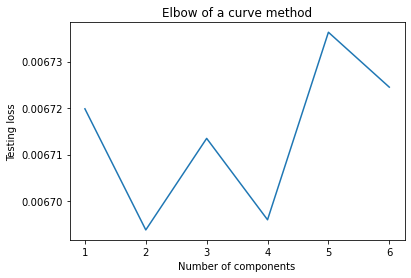

In [5]:
n_comps = np.arange(1, 7)
losses = []
for n in n_comps:
    loss = 0
    for _ in range(3):
        model = neuralnetwork.NeuralNetwork(n_comps=n, n_params=NUM_PARAMS, n_hidden=HIDDEN, mixture=MIXTURE, print_info=False)
        neuralnetwork.train_NN(model, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE, print_results=False, print_info=False)
    loss += neuralnetwork.mean_loss(X_test, y_test, model, loss=neuralnetwork.loss_hellinger).detach().item()
    losses.append(loss/3)
    print(f'Computed loss with {n} components - average loss = {loss/3}.')
plt.plot(n_comps, losses)
plt.xlabel('Number of components')
plt.ylabel('Testing loss')
plt.title('Elbow of a curve method')
plt.show()

In [5]:
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [11]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=HIDDEN, mixture=MIXTURE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=HIDDEN, mixture=MIXTURE)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=HIDDEN, mixture=MIXTURE)

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [13]:
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=HIDDEN, mixture=MIXTURE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Mixture Density Network created.


Training ...: 100%|█████████▉| 699/700 [06:10<00:00,  1.89it/s]

Learning rate: 2.5177519986929707e-08,
Train loss: 0.0015832912176847458,
 Valid loss: 0.0016037513269111514


In [12]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Training ...: 100%|█████████▉| 699/700 [06:07<00:00,  1.90it/s]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0015954942209646106,
 Valid loss: 0.0016474362928420305


Training ...: 100%|█████████▉| 699/700 [06:29<00:00,  1.79it/s]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.001646272954531014,
 Valid loss: 0.0016755377873778343


Training ...:  42%|████▏     | 295/700 [02:52<03:57,  1.71it/s]

Learning rate: 0.0031108510153447346,
Train loss: 0.002235164400190115,
 Valid loss: 0.002274830127134919


In [14]:
for i, model in enumerate([model1, model2, model3]):
    save_load_MDN.save_MDN_model(model, f'CRN1_model{i+1}_comps4.pt')

In [6]:
model1 = save_load_MDN.load_MDN_model('CRN1_model1_comps4.pt')
model2 = save_load_MDN.load_MDN_model('CRN1_model2_comps4.pt')
model3 = save_load_MDN.load_MDN_model('CRN1_model3_comps4.pt')

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [8]:
# Compute losses

print("Training dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nValidation dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nTest dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Training dataset
KLD : 0.0022818734869360924
Hellinger : 0.02365061268210411

Validation dataset
KLD : 0.0023163629230111837
Hellinger : 0.023847272619605064

Test dataset
KLD : 0.0022840381134301424
Hellinger : 0.023656725883483887


## Distributions plot

To compare predicted distributions to the theoretical ones. Given an initial condition of 0 $S$, the population of $S$ at any later time is a random integer sampled from a Poisson distribution :

$$f(x, t, \theta) = \frac{(\theta t)^xe^{-\theta t}}{x!}$$

In [7]:
def pure_production_distribution(x, params):
    t, theta = params[0], params[1]
    return poisson.pmf(x, t*theta)

In [8]:
NAME = 'Pure Production CRN'

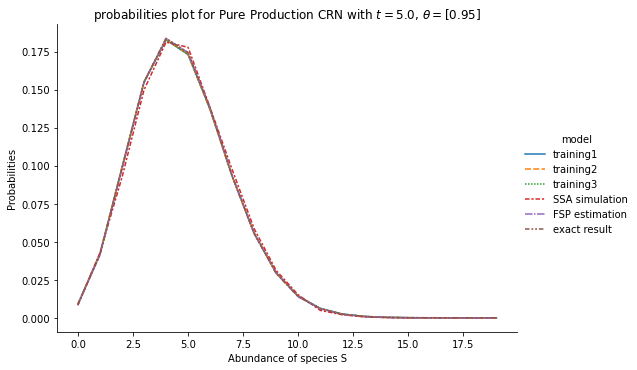

In [10]:
index = 100
plot.plot_model(to_pred=X_test[index, :], 
        models=[model1, model2, model3], 
        up_bound=20,
        n_comps=N_COMPS,
        plot_test_result=(True, y_test[index, :]),
        plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
        plot_exact_result=(True, pure_production_distribution),
        crn_name=NAME)

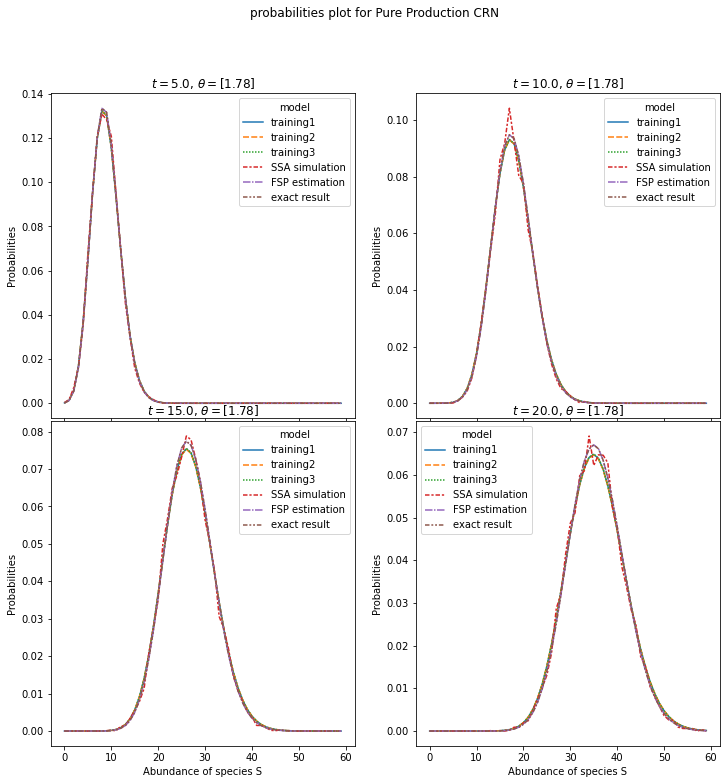

In [11]:
# middle value of the test dataset, save=(True, "4distributions.png")
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
            models=[model1, model2, model3], 
            up_bound=4*[60], 
            n_comps=N_COMPS,
            plot_test_result=(True, [y_test[992+k,:] for k in range(4)]),
            plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
            plot_exact_result=(True, pure_production_distribution),
            save=(False, "4distributions.png"),
            crn_name=NAME)

We can check the accuracy for higher times than those of the training :

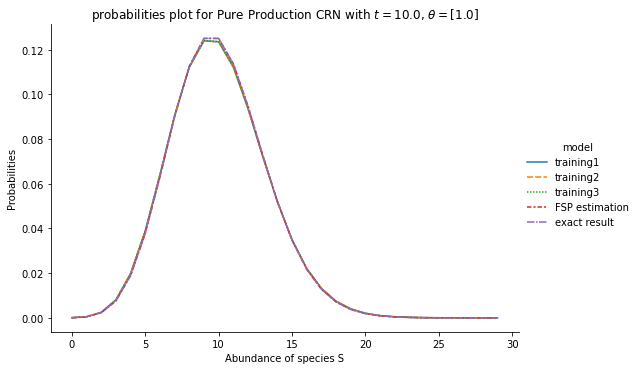

In [19]:
plot.plot_model(to_pred=torch.tensor([10., 1.]), 
        models=[model1, model2, model3], 
        up_bound=30,
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_distribution),
        plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
        save=(False, "t10c1.png"),
        crn_name=NAME)

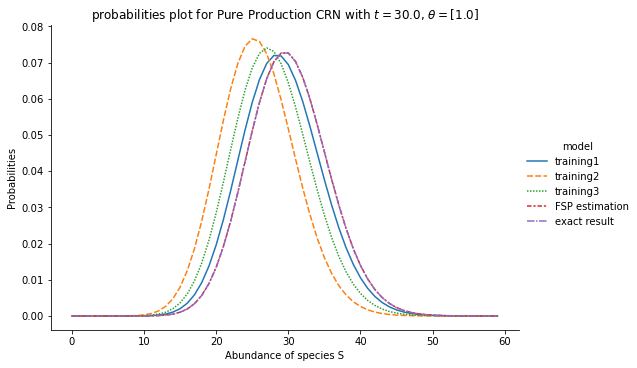

In [20]:
plot.plot_model(to_pred=torch.tensor([30., 1.]),
        models=[model1, model2, model3], 
        up_bound = 60, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_distribution),
        plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
        save=(False, "t30c1.png"),
        crn_name=NAME)

We can also check the accuracy for parameters outside the bounds of the training.

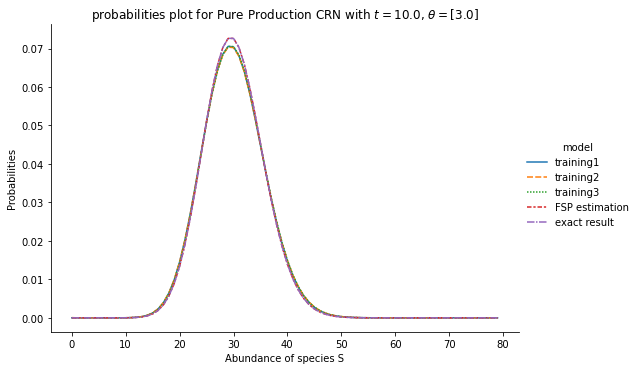

In [21]:
plot.plot_model(to_pred=torch.tensor([10., 3.]), 
        models=[model1, model2, model3], 
        up_bound = 80, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_distribution),
        plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
        save=(False, 't10c3.png'),
        crn_name='Pure Production CRN')

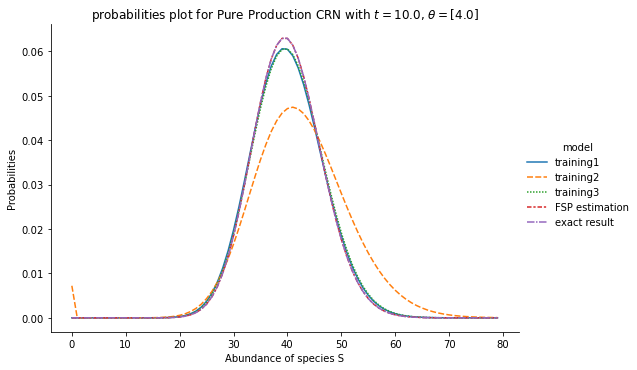

In [22]:
plot.plot_model(to_pred=torch.tensor([10., 4.]), 
        models=[model1, model2, model3], 
        up_bound = 80, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_distribution),
        plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
        save=(False, 't10c3.png'),
        crn_name='Pure Production CRN')

## Sentivities plot

To compute sensitivites and compare them to the theoretical ones. 

$$\nabla_{\theta} f(x, t, \theta) = \frac{t^x\theta^{x-1}e^{-\theta t}(x-t\theta)}{x!}

In [23]:
def pure_production_sensitivity(x, params):
    t, theta = params[0], params[1]
    return t * (poisson.pmf(x-1, theta*t) - poisson.pmf(x, theta*t))

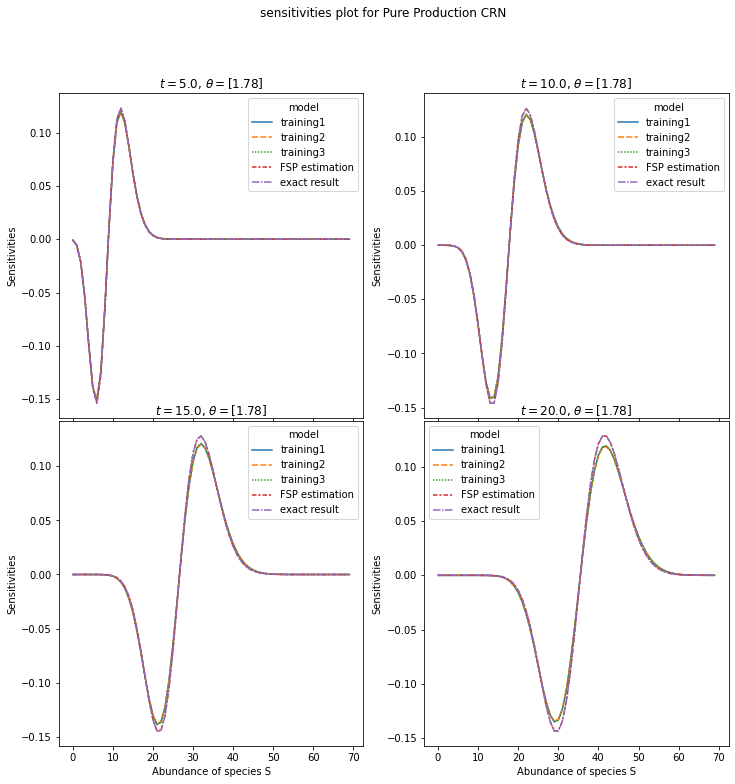

In [24]:
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
                models=[model1, model2, model3], 
                up_bound=[70]*4, 
                n_comps=N_COMPS,
                plot_exact_result=(True, pure_production_sensitivity),
                plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
                plot=('sensitivities', 0),
                index_names = ('Sensitivities', 'Abundance of species S'), 
                save=(False, "sensitivities_median.png"),
                crn_name=NAME)

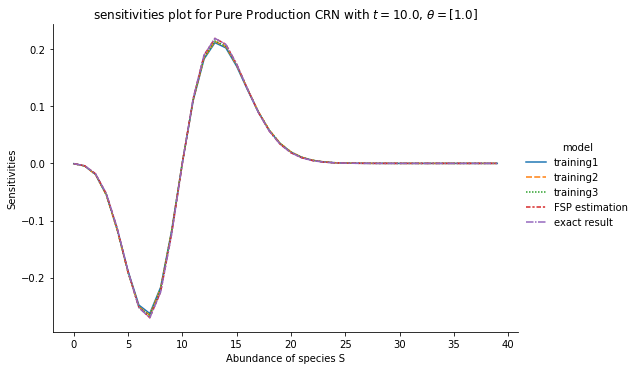

In [25]:
plot.plot_model(to_pred=torch.tensor([10., 1.]), 
        models=[model1, model2, model3], 
        up_bound=40, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_sensitivity),
        plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
        plot=('sensitivities', 0),
        index_names = ('Sensitivities', 'Abundance of species S'),
        save=(False, 'sensitivites_t10c1.png'),
        crn_name=NAME)

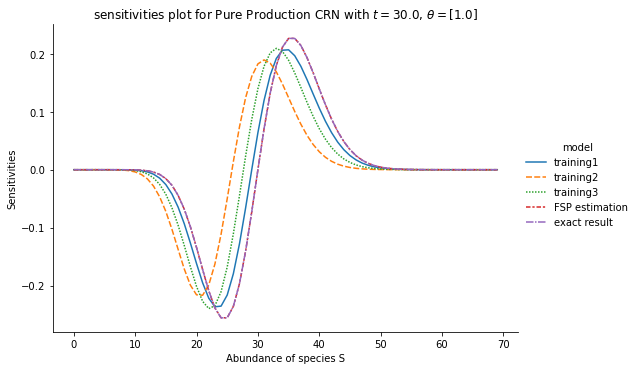

In [26]:
plot.plot_model(to_pred=torch.tensor([30., 1.]), 
        models=[model1, model2, model3], 
        up_bound=70, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_sensitivity),
        plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
        plot=('sensitivities', 0),
        index_names = ('Sensitivities', 'Abundance of species S'),
        save=(False, "sensitivities_t30c1.png"),
        crn_name=NAME)

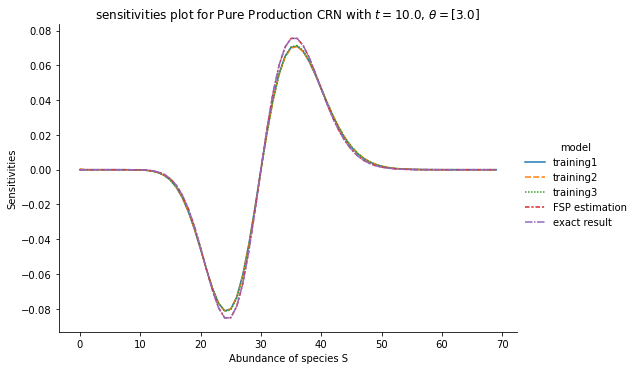

In [27]:
plot.plot_model(to_pred=torch.tensor([10., 3.]),
        models=[model1, model2, model3], 
        up_bound=70, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_sensitivity),
        plot_fsp_result=(True, np.expand_dims(propensities.stoich_mat, axis=0), propensities.propensities, 100, None, 0),
        plot=('sensitivities', 0),
        index_names = ('Sensitivities', 'Abundance of species S'),
        save=(False, "sensitivities_t10c3.png"),
        crn_name=NAME)

## Fisher information

In [28]:
def exact_fim(t, params, up_bound=500):
    res = 0
    theta = params[0]
    for k in range(up_bound):
        res += (k/theta - t)**2*pure_production_distribution(k, [t, theta])
    return res

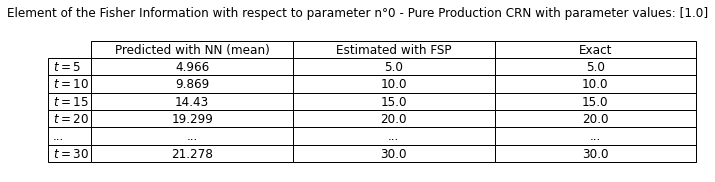

In [30]:
plot.fi_table(time_samples=[5, 10, 15, 20, 30],
        params=[1.], 
        ind_param=0, 
        models=(True, [model2, model3], N_COMPS), 
        plot_exact=(True, exact_fim),
        plot_fsp=(True, np.expand_dims(propensities.stoich_mat, axis=0), np.array([propensities.lambda1]), 100, None, 0),
        up_bound=100,
        crn_name=NAME,
        out_of_bounds_index=4)

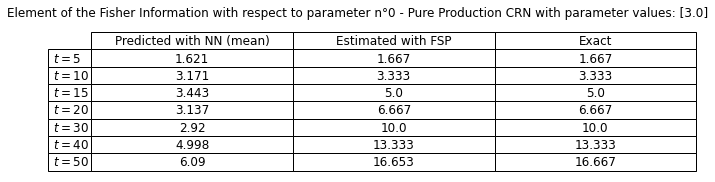

In [35]:
plot.fi_table(time_samples=[5, 10, 15, 20, 30, 40, 50], 
        params=[3.], 
        ind_param=0, 
        models=(True, [model2, model3], N_COMPS), 
        plot_exact=(True, exact_fim),
        plot_fsp=(True, np.expand_dims(propensities.stoich_mat, axis=0), np.array([propensities.lambda1]), 200, None, 0),
        up_bound=100,
        crn_name=NAME)